In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import git
import os

git_repo = git.Repo('.', search_parent_directories=True) 
git_root = git_repo.git.rev_parse('--show-toplevel')

In [133]:
df = pd.read_csv("../annotated/spidr_autoregulatory_binding_matrix.csv")
df.set_index('Unnamed: 0', inplace=True)

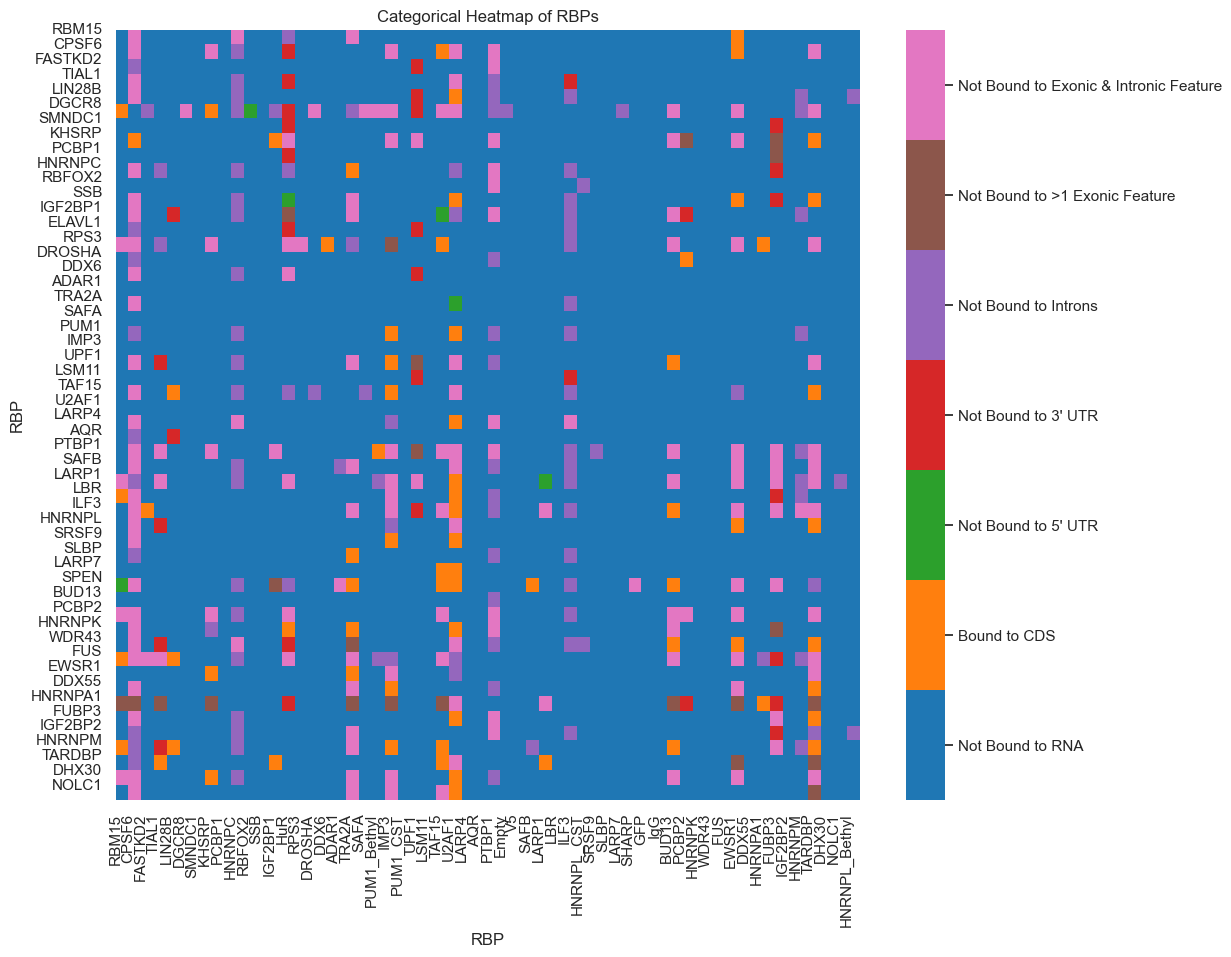

<Figure size 1200x1000 with 0 Axes>

In [135]:
sns.set(rc={'figure.figsize':(12,10)})

value_to_int = {
    'Not Bound to RNA': 0,
    'Bound to CDS': 1,
    "Not Bound to 5' UTR": 2,
    "Not Bound to 3' UTR": 3,
    'Not Bound to Introns': 4,
    'Not Bound to >1 Exonic Feature': 5,
    'Not Bound to Exonic & Intronic Feature': 6
}

# discrete colormap (n samples from a given cmap)
n = len(value_to_int)
cmap = sns.color_palette("tab10", n) 
ax = sns.heatmap(df, cmap=cmap, ) 
ax.set_xticks(np.arange(df.shape[1]), labels=df.columns)
ax.set_yticks(np.arange(df.shape[0]), labels=df.index)
ax.set_ylabel("RBP")
ax.set_xlabel("RBP")
ax.set_title("Categorical Heatmap of RBPs")

# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()
plt.savefig(os.path.join(git_root, "figures/categorical-heatmap.png"))